In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt


DIA = pd.read_csv('2023_Disproportionately_Impacted_Areas2.csv')
print(DIA.head())



          GEOID  Town(s)  Median Household Income  Poverty Rate  \
0           NaN      NaN                      NaN           NaN   
1  9.013528e+09  Andover                 102759.0          0.02   
2  9.009125e+09  Ansonia                  57602.0          0.21   
3  9.009125e+09  Ansonia                  47382.0          0.16   
4  9.009125e+09  Ansonia                  55446.0          0.07   

   Census Population  Conviction Count  Conviction Rate  DIA  \
0                NaN               NaN              NaN  NaN   
1             3151.0             70.00             0.02  0.0   
2             5167.0            920.04             0.18  1.0   
3             3496.0            408.57             0.12  1.0   
4             5888.0            514.53             0.09  0.0   

                                            Geometry  
0                                                NaN  
1  POLYGON ((-72.42281799999999 41.73196, -72.421...  
2  POLYGON ((-73.102186 41.35302, -73.102018 41

In [2]:
DIA = DIA.dropna()
DIA.head().to_html('head_table.html')
print(DIA.head())

          GEOID  Town(s)  Median Household Income  Poverty Rate  \
1  9.013528e+09  Andover                 102759.0          0.02   
2  9.009125e+09  Ansonia                  57602.0          0.21   
3  9.009125e+09  Ansonia                  47382.0          0.16   
4  9.009125e+09  Ansonia                  55446.0          0.07   
5  9.009125e+09  Ansonia                  83750.0          0.07   

   Census Population  Conviction Count  Conviction Rate  DIA  \
1             3151.0             70.00             0.02  0.0   
2             5167.0            920.04             0.18  1.0   
3             3496.0            408.57             0.12  1.0   
4             5888.0            514.53             0.09  0.0   
5             4367.0            155.89             0.04  0.0   

                                            Geometry  
1  POLYGON ((-72.42281799999999 41.73196, -72.421...  
2  POLYGON ((-73.102186 41.35302, -73.102018 41.3...  
3  POLYGON ((-73.091169 41.360543, -73.090965 4

## 1. What variable has the biggest impact on the conviction rate in Connecticut?

In [3]:
#Explanatory Variables
X = DIA[['Median Household Income', 'Poverty Rate', 'Census Population']]

#Response Variable
y = DIA['Conviction Rate']

# Fit the regression model
model1 = LinearRegression().fit(X, y)

coefficients = model1.coef_
variable_with_biggest_impact = X.columns[coefficients.argmax()]
print("Variable with the biggest impact:", variable_with_biggest_impact)

Variable with the biggest impact: Poverty Rate


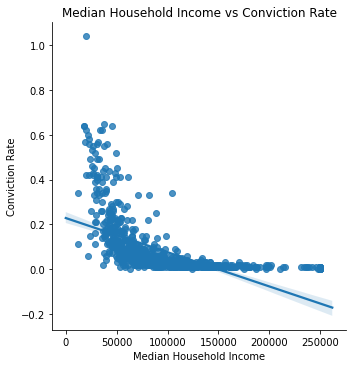

In [4]:
sns.lmplot(x='Median Household Income', y='Conviction Rate', data=DIA)
plt.title('Median Household Income vs Conviction Rate')
plt.xlabel('Median Household Income')
plt.ylabel('Conviction Rate')
plt.savefig('Median_Household_Income_vs_Conviction_Rate.png')
plt.show()

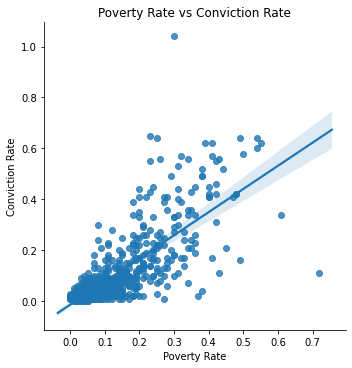

In [5]:
sns.lmplot(x='Poverty Rate', y='Conviction Rate', data=DIA)
plt.title('Poverty Rate vs Conviction Rate')
plt.xlabel('Poverty Rate')
plt.ylabel('Conviction Rate')
plt.savefig('Poverty_Rate_vs_Conviction_Rate.png')
plt.show()

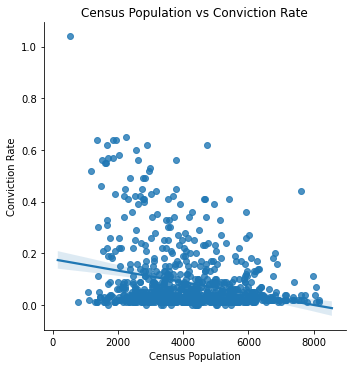

In [6]:
sns.lmplot(x='Census Population', y='Conviction Rate', data=DIA)
plt.title('Census Population vs Conviction Rate')
plt.xlabel('Census Population')
plt.ylabel('Conviction Rate')
plt.savefig('Census_Population_vs_Conviction_Rate1.png')
plt.show()

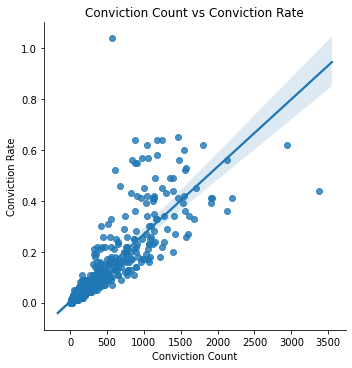

In [7]:
sns.lmplot(x='Conviction Count', y='Conviction Rate', data=DIA)
plt.title('Conviction Count vs Conviction Rate')
plt.xlabel('Conviction Count')
plt.ylabel('Conviction Rate')
plt.savefig('Conviction_Count_vs_Conviction_Rate.png')
plt.show()

## 2. Of the disproportionately impacted areas, is there a significant relationship between poverty and conviction rate?

In [8]:
# Filter disproportionately impacted areas
disprop_data = DIA[DIA['DIA'] == 1]

# Define independent variable
X = disprop_data[['Poverty Rate']]

# Define dependent variable
y = disprop_data['Conviction Rate']

# Create and fit the model
model2 = LinearRegression().fit(X, y)

# Predict the values
y_pred = model2.predict(X)

# Calculate R-squared
r_squared = model2.score(X, y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate p-value for the coefficient
n = len(X)
k = X.shape[1]
p = k + 1  # Number of predictors including the intercept
F = (r_squared / (1 - r_squared)) * ((n - p) / (p - 1))  # F-statistic
p_value = 1 - stats.f.cdf(F, p - 1, n - p)

# Print summary
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Coefficient:", model2.coef_[0])
print("Intercept:", model2.intercept_)
print("P-value for coefficient:", p_value)

R-squared: 0.36751946358414395
Mean Squared Error: 0.016909975029090134
Coefficient: 0.915957707816429
Intercept: 0.0048480381173247045
P-value for coefficient: 1.1102230246251565e-16


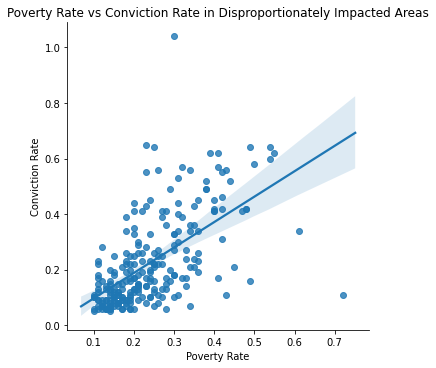

In [9]:
sns.lmplot(x='Poverty Rate', y='Conviction Rate', data=disprop_data)
plt.title('Poverty Rate vs Conviction Rate in Disproportionately Impacted Areas')
plt.xlabel('Poverty Rate')
plt.ylabel('Conviction Rate')
plt.savefig('Poverty_Rate_vs_Conviction_Rate_in_Disproportionately_Impacted_Areas.png')
plt.show()

## 3. How does an area's population size relate to its conviction rate?

In [10]:
# Define independent variable
X = DIA[['Census Population']]

# Define dependent variable
y = DIA['Conviction Rate']

# Create and fit the model
model3 = LinearRegression().fit(X, y)

# Predict the values
y_pred = model3.predict(X)

# Calculate R-squared
r_squared = model3.score(X, y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate p-value for the coefficient
n = len(X)
k = X.shape[1]
p = k + 1  # Number of predictors including the intercept
F = (r_squared / (1 - r_squared)) * ((n - p) / (p - 1))  # F-statistic
p_value = 1 - stats.f.cdf(F, p - 1, n - p)

# Print summary
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Coefficient:", model3.coef_[0])
print("Intercept:", model3.intercept_)
print("P-value for coefficient:", p_value)

R-squared: 0.06495514363476851
Mean Squared Error: 0.014324527228276575
Coefficient: -2.216853406310218e-05
Intercept: 0.17694033550476645
P-value for coefficient: 2.375877272697835e-14


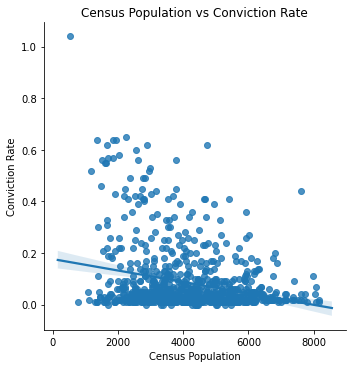

In [11]:
sns.lmplot(x='Census Population', y='Conviction Rate', data=DIA)
plt.title('Census Population vs Conviction Rate')
plt.xlabel('Census Population')
plt.ylabel('Conviction Rate')
plt.show()